In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({
  "text.usetex": True,
  "text.latex.preamble": "\\usepackage{mathtools}"
})
plt.ioff()

In [2]:
bad = "fuchsia"

#Special colormap for plotting the consistency condition
cc_cmap = mpl.colormaps['Blues_r']
cc_cmap.set_bad(bad)

#special colormap for plotting slow-roll parameters
sr_cmap = mpl.colormaps['Blues_r']
sr_cmap.set_bad(bad)
sr_cmap.set_over("Orange")

#delta map
delta_cmap = mpl.colormaps['Blues'].resampled(8)
delta_cmap.set_bad(bad)

In [3]:
extent_angular = (-1.05, 1.05, -1.05, 1.05)
extent_egno = (0.46, 0.50, 0.0, np.pi)
extent_d5 = (0.0, 36.0, 0.0, 4*np.pi)

def ratio(extent): return (extent[1] - extent[0]) / (extent[-1] - extent[-2])
def range_to_idxs(x1, x2, y1, y2, extent, N):
  Nx, Ny = N
  idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
  idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))
  return (idx1, idx2, idy1, idy2)

In [4]:
x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")
traj_angular = [x, y]

x, y = np.load("./trajectories/egno_r.npy"), np.load("./trajectories/egno_theta.npy")
traj_egno = [x, y]

trajectory = np.loadtxt("./trajectories/d5_trajectory.dat")
x, y = trajectory[:,0], trajectory[:,1]
traj_d5 = [x, y]

# Consistency conditions

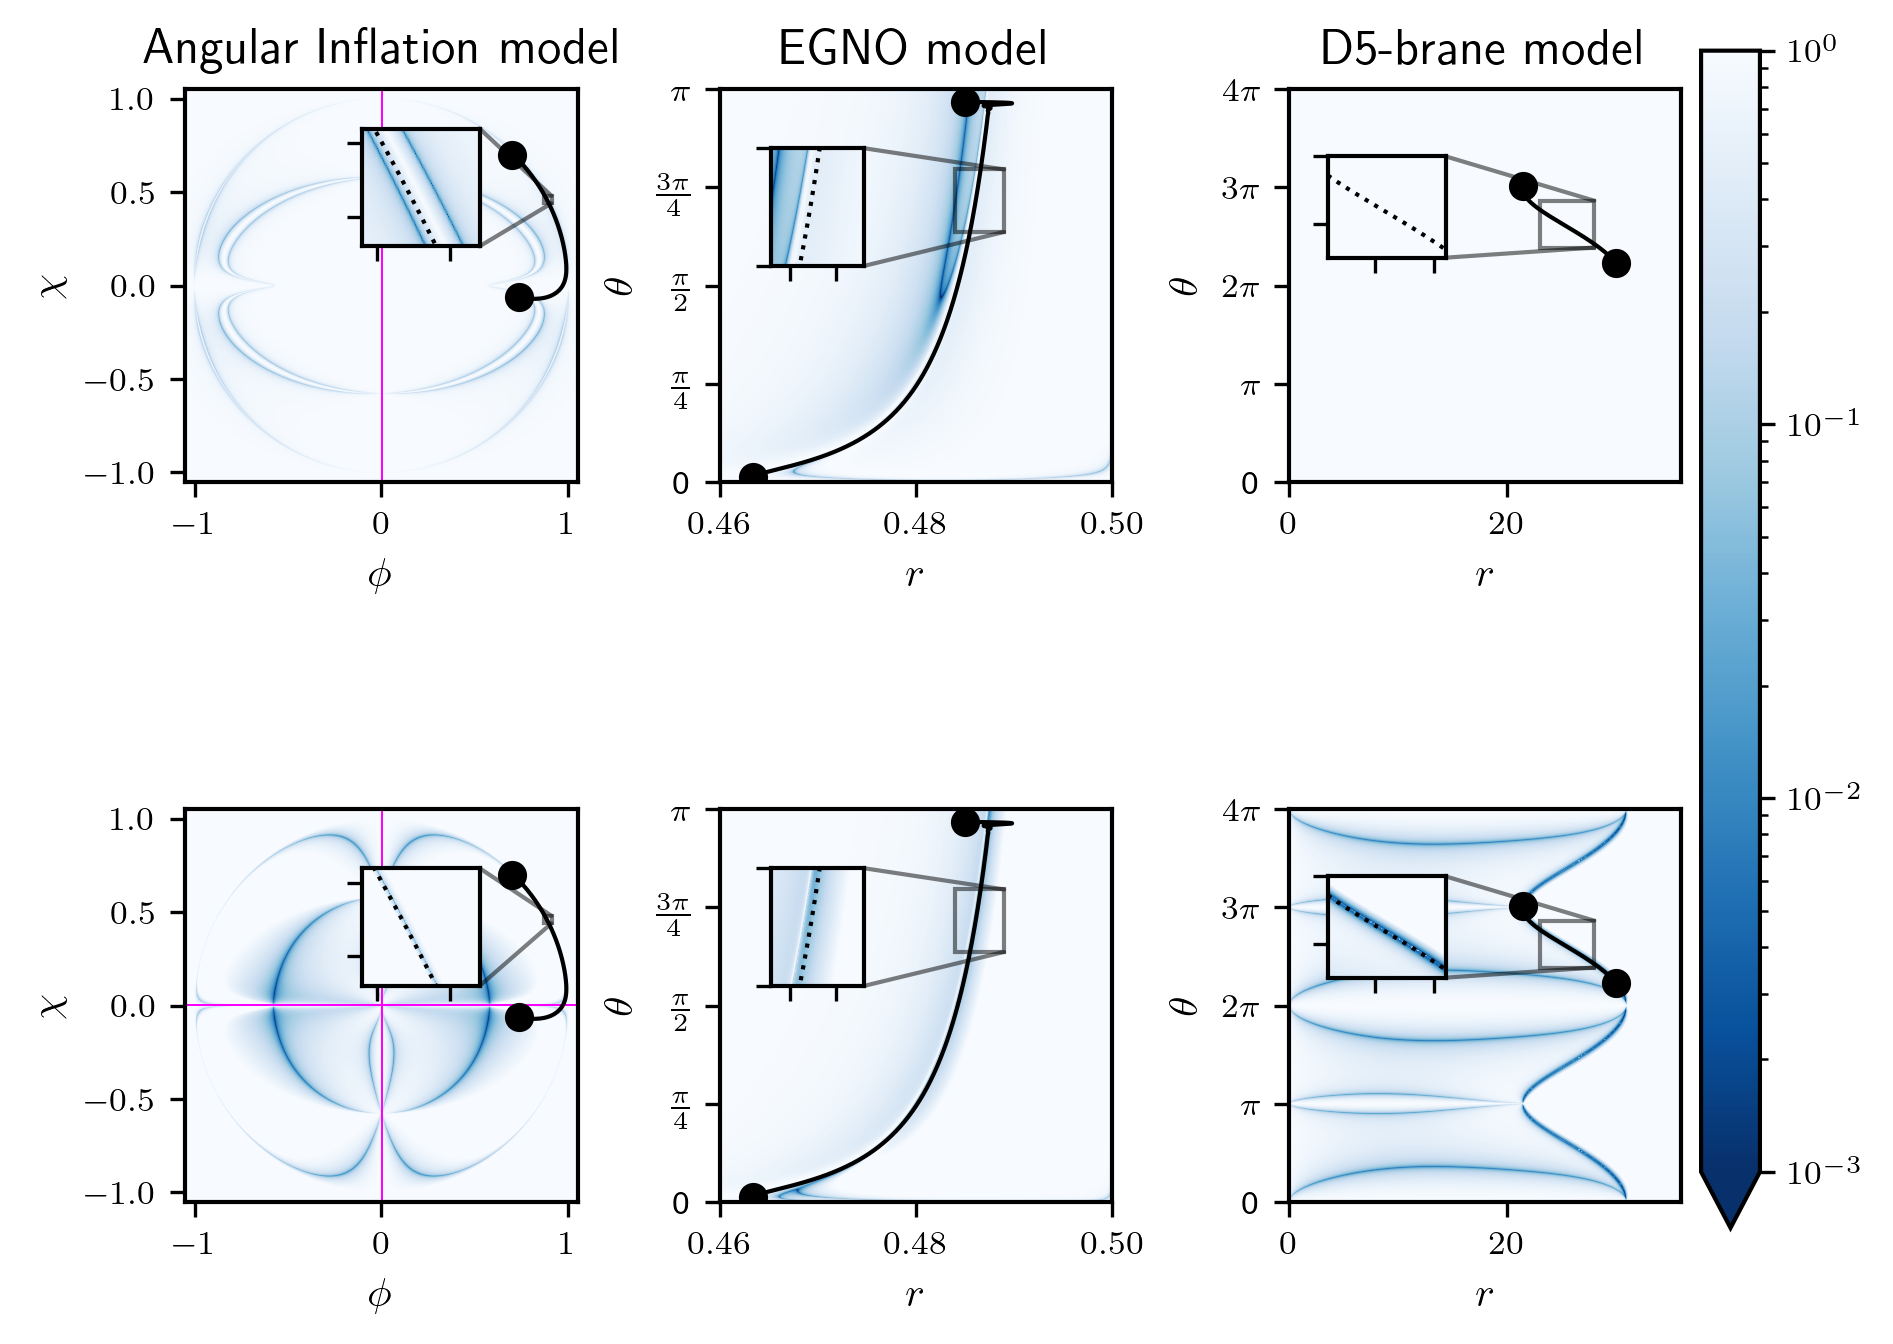

In [8]:
angular = np.load("./out/angular.npy")
egno = np.load("./out/egno.npy")
d5 = np.load("./out/d5.npy")

angular_old = np.load("./out/angular_old.npy")
egno_old = np.load("./out/egno_old.npy")
d5_old = np.load("./out/d5_old.npy")

fig, axs = plt.subplots(
  2, 3,
  constrained_layout=True
)
fig.set_figwidth(6.2)

#
# Angular
#
ax = axs[1,0]
x, y = traj_angular

#show consistency condition
image = ax.imshow(np.transpose(angular),
  extent = extent_angular,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_angular),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_angular, angular.shape)

zoom = angular[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.45, 0.55, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_angular),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#show consistency condition
ax = axs[0,0]

image = ax.imshow(np.transpose(angular_old),
  extent = extent_angular,
  cmap = cc_cmap,
  aspect = ratio(extent_angular),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)

zoom = angular_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.45, 0.6, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_angular),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

ax.set_title('Angular Inflation model')

#
# EGNO
#
ax = axs[1,1]
x, y = traj_egno

#show consistency condition
image = ax.imshow(np.transpose(egno),
  extent = extent_egno,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_egno),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_egno, egno.shape)

zoom = egno[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.55, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_egno),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$','$\\frac{3\\pi}{4}$','$\\pi$'])

#show consistency condition
ax = axs[0,1]

image = ax.imshow(np.transpose(egno_old),
  extent = extent_egno,
  cmap = cc_cmap,
  aspect = ratio(extent_egno),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_egno, egno.shape)

zoom = egno_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.55, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_egno),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$','$\\frac{3\\pi}{4}$','$\\pi$'])

ax.set_title('EGNO model')

#
# D5-brane
#
ax = axs[1,2]
x, y = traj_d5

#show consistency condition
image = ax.imshow(np.transpose(d5),
  extent = extent_d5,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_d5),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_d5, d5.shape)

zoom = d5[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.55, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_d5),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#show consistency condition
ax = axs[0,2]

image = ax.imshow(np.transpose(d5_old),
  extent = extent_d5,
  cmap = cc_cmap,
  aspect = ratio(extent_d5),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_d5, d5.shape)

zoom = d5_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.55, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_d5),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

ax.set_title('D5-brane model')

#add a colorbar
fig.colorbar(image, extend='min', ax=axs[:,-1])

fig.get_layout_engine().set(hspace=0, h_pad=0)

fig.savefig('./figs/consistency.pdf', pad_inches=0)
fig

# Epsilon

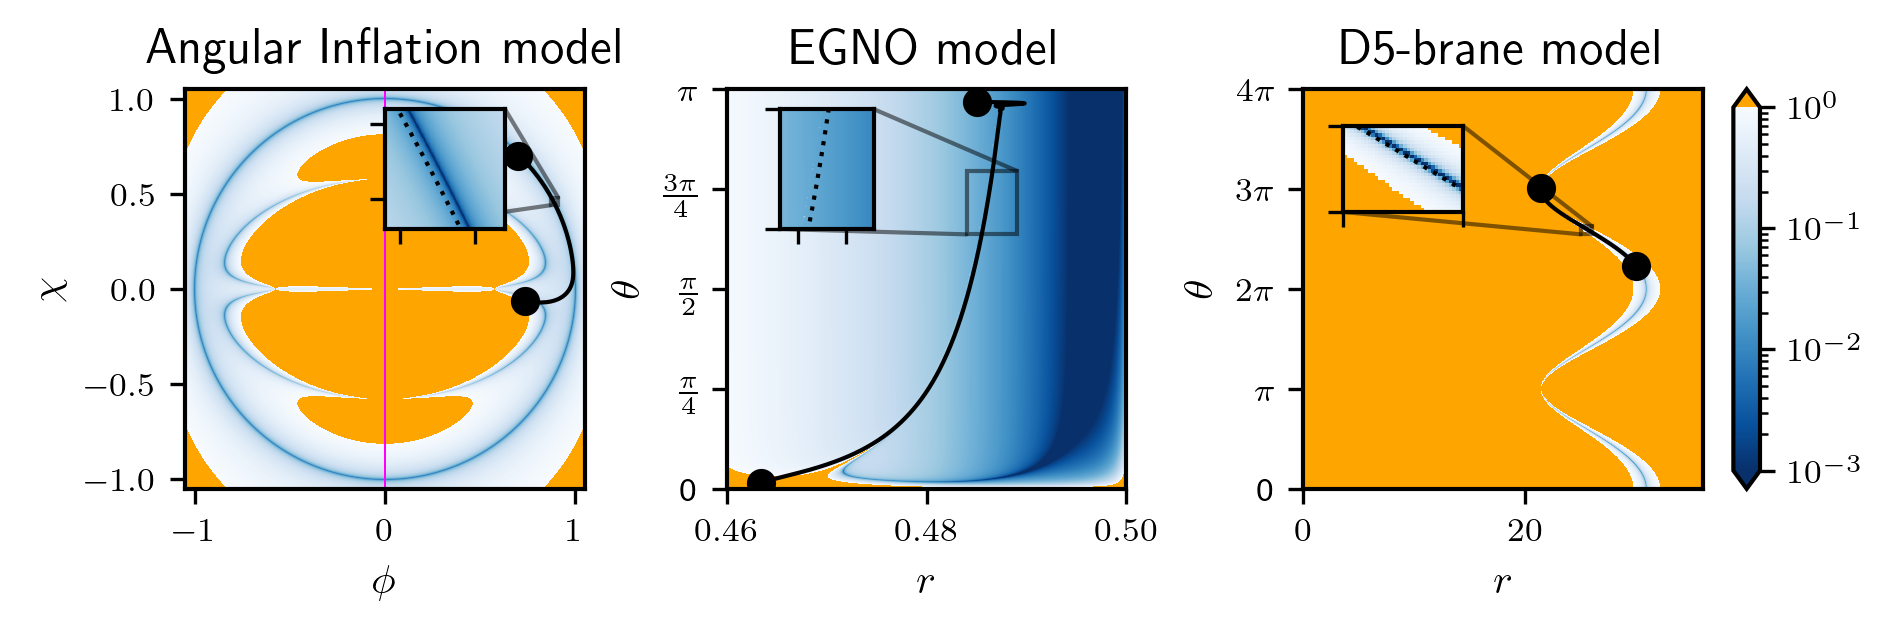

In [29]:
angular = np.load("./out/angular_epsilon_H.npy")
egno = np.load("./out/egno_epsilon_H.npy")
d5 = np.load("./out/d5_epsilon_H.npy")

fig, axs = plt.subplots(1, 3, layout="compressed")
fig.set_figwidth(6.2)

#
# Angular
#
ax = axs[0]
x, y = traj_angular

#show consistency condition
image = ax.imshow(np.transpose(angular),
  extent = extent_angular,
  cmap = sr_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_angular),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_angular, angular.shape)

zoom = angular[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = sr_cmap,
  aspect = ratio(extent_angular),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

ax.set_title('Angular Inflation model')

#
# EGNO
#
ax = axs[1]
x, y = traj_egno

#show consistency condition
image = ax.imshow(np.transpose(egno),
  extent = extent_egno,
  cmap = sr_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_egno),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_egno, egno.shape)

zoom = egno[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = sr_cmap,
  aspect = ratio(extent_egno),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$','$\\frac{3\\pi}{4}$','$\\pi$'])

ax.set_title('EGNO model')

#
# D5-brane
#
ax = axs[2]
x, y = traj_d5

#show consistency condition
image = ax.imshow(np.transpose(d5),
  extent = extent_d5,
  cmap = sr_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio(extent_d5),
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.25 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_d5, d5.shape)

zoom = d5[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = sr_cmap,
  aspect = ratio(extent_d5),
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

ax.set_title('D5-brane model')

#add a colorbar
fig.colorbar(image, extend='both', ax=axs.ravel().tolist(), aspect=15, pad=0.02)

fig.savefig('./figs/epsilonH.pdf', bbox_inches="tight", pad_inches=0)
fig

# delta

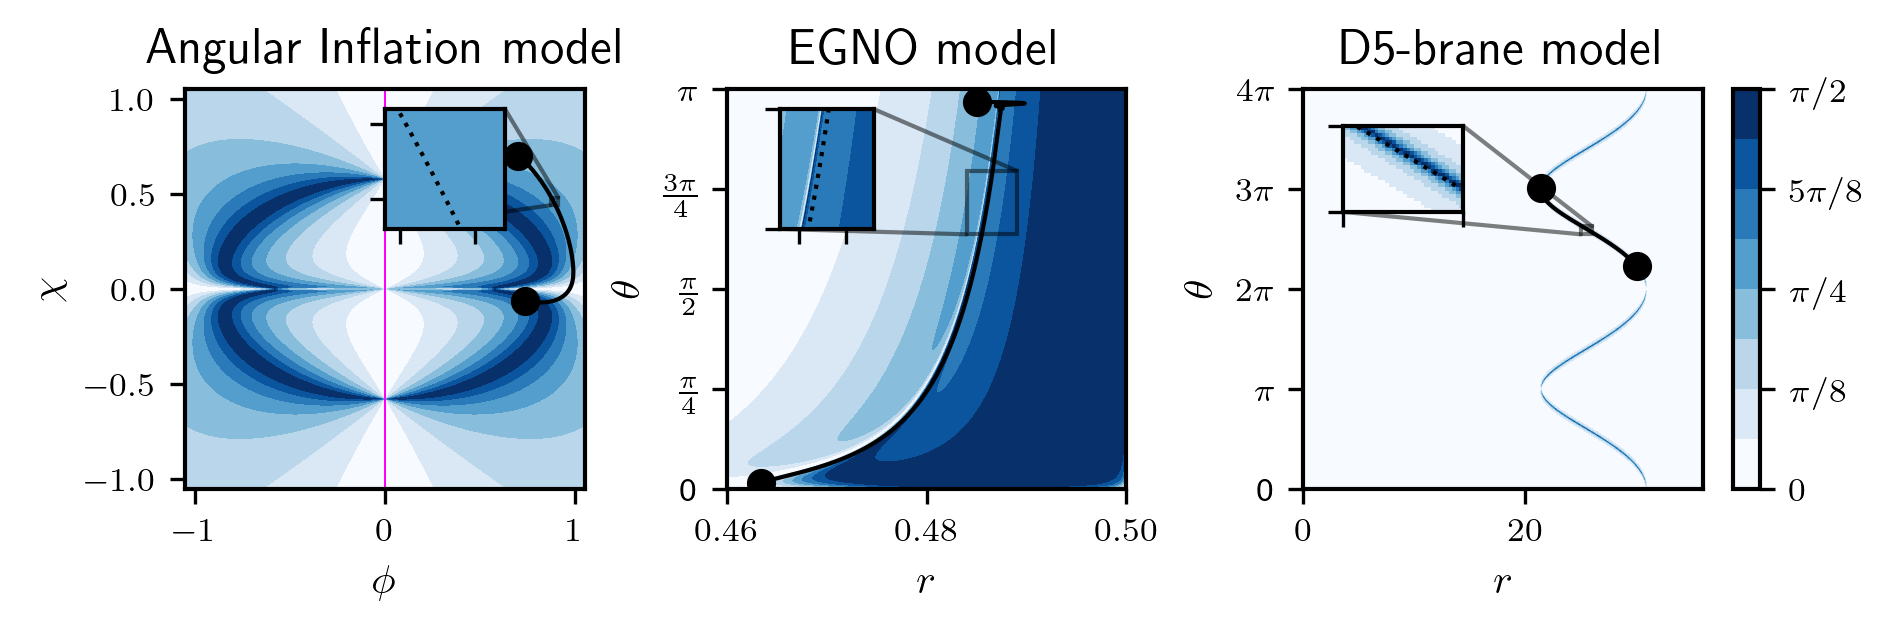

In [30]:
angular = np.abs(np.load("./out/angular_delta.npy"))
egno = np.abs(np.load("./out/egno_delta.npy"))
d5 = np.abs(np.load("./out/d5_delta.npy"))

fig, axs = plt.subplots(1, 3, layout="compressed")
fig.set_figwidth(6.2)

#
# Angular
#
ax = axs[0]
x, y = traj_angular

#show consistency condition
image = ax.imshow(np.transpose(angular),
  extent = extent_angular,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio(extent_angular),
  vmin=0,
  vmax=np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_angular, angular.shape)

zoom = angular[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = delta_cmap,
  aspect = ratio(extent_angular),
  origin = 'lower',
  vmin=0,
  vmax=np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

ax.set_title('Angular Inflation model')

#
# EGNO
#
ax = axs[1]
x, y = traj_egno

#show consistency condition
image = ax.imshow(np.transpose(egno),
  extent = extent_egno,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio(extent_egno),
  vmin=0,
  vmax=np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_egno, egno.shape)

zoom = egno[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = delta_cmap,
  aspect = ratio(extent_egno),
  origin = 'lower',
  vmin=0,
  vmax=np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$','$\\frac{3\\pi}{4}$','$\\pi$'])

ax.set_title('EGNO model')

#
# D5-brane
#
ax = axs[2]
x, y = traj_d5

#show consistency condition
image = ax.imshow(np.transpose(d5),
  extent = extent_d5,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio(extent_d5),
  vmin=0,
  vmax=np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.25 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_d5, d5.shape)

zoom = d5[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = delta_cmap,
  aspect = ratio(extent_d5),
  origin = 'lower',
  vmin=0,
  vmax=np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

ax.set_title('D5-brane model')

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/8 for n in np.arange(0, 5)], ax=axs.ravel().tolist(), aspect=15, pad=0.02)
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])

fig.savefig('./figs/delta.pdf', bbox_inches="tight", pad_inches=0)
fig

# omega

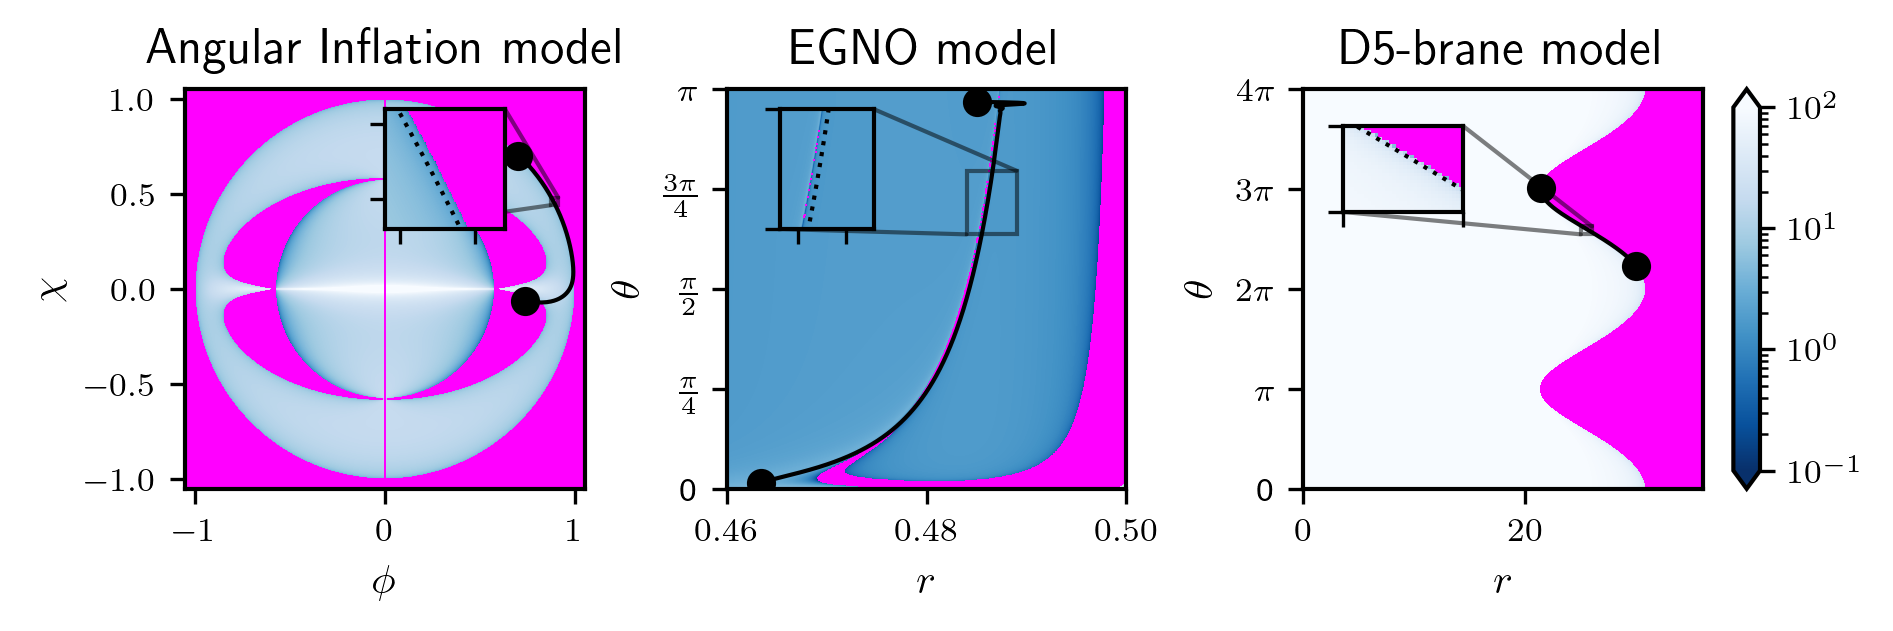

In [31]:
angular = np.abs(np.load("./out/angular_omega.npy"))
egno = np.abs(np.load("./out/egno_omega.npy"))
d5 = np.abs(np.load("./out/d5_omega.npy"))

fig, axs = plt.subplots(1, 3, layout="compressed", gridspec_kw={'wspace': 0})
fig.set_figwidth(6.2)

vmax, vmin = 1e2, 1e-1

#
# Angular
#
ax = axs[0]
x, y = traj_angular

#show consistency condition
image = ax.imshow(np.transpose(angular),
  extent = extent_angular,
  cmap = cc_cmap,
  origin = 'lower',
  aspect = ratio(extent_angular),
  vmax=vmax,
  vmin=vmin,
  norm='log'
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_angular, angular.shape)

zoom = angular[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_angular),
  origin = 'lower',
  vmax=vmax,
  vmin=vmin,
  norm='log'
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

ax.set_title('Angular Inflation model')

#
# EGNO
#
ax = axs[1]
x, y = traj_egno

#show consistency condition
image = ax.imshow(np.transpose(egno),
  extent = extent_egno,
  cmap = cc_cmap,
  origin = 'lower',
  aspect = ratio(extent_egno),
  vmax=vmax,
  vmin=vmin,
  norm='log'
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_egno, egno.shape)

zoom = egno[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_egno),
  origin = 'lower',
  vmax=vmax,
  vmin=vmin,
  norm='log'
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$','$\\frac{3\\pi}{4}$','$\\pi$'])

ax.set_title('EGNO model')

#
# D5-brane
#
ax = axs[2]
x, y = traj_d5

#show consistency condition
image = ax.imshow(np.transpose(d5),
  extent = extent_d5,
  cmap = cc_cmap,
  origin = 'lower',
  aspect = ratio(extent_d5),
  vmax=vmax,
  vmin=vmin,
  norm='log'
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.25 # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2, idy1, idy2 = range_to_idxs(*zoom_extent, extent_d5, d5.shape)

zoom = d5[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio(extent_d5),
  origin = 'lower',
  vmax=vmax,
  vmin=vmin,
  norm='log'
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

ax.set_title('D5-brane model')

#add a colorbar
fig.colorbar(image, extend="both", ax=axs.ravel().tolist(), aspect=15, pad=0.02)
fig.savefig('./figs/omega.pdf', bbox_inches="tight", pad_inches=0)
fig